## Linear Regression

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


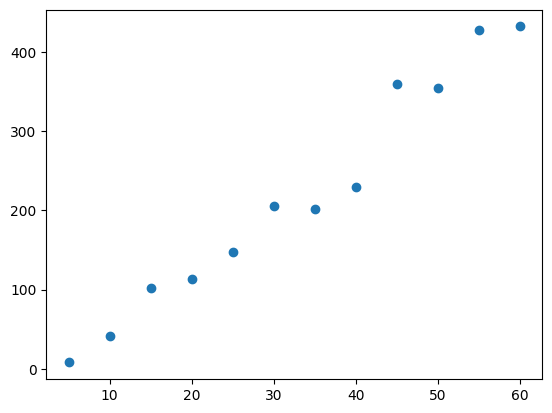

ทำกิจกรรมนาน 8 นาที เผาผลาญ 23.87 แคลอรี
ทำกิจกรรมนาน 18 นาที เผาผลาญ 103.38 แคลอรี
ทำกิจกรรมนาน 33 นาที เผาผลาญ 222.64 แคลอรี
ทำกิจกรรมนาน 59 นาที เผาผลาญ 429.37 แคลอรี

สมการทำนายผลคือ: y = -39.74 + (7.95)x


In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

x = list(range(5, 61, 5))    #[5, 10, 15, ..., 60]
y = [8, 42, 102, 113, 148, 206, 202, 230, 360, 354, 427, 432]

plt.scatter(x, y)
plt.show()

x = np.array(x).reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

#ทำนายผล นาทีที่ 8, 18, 33 และ 59
x_predict = [[8], [18], [33], [59]]
y_predict = model.predict(x_predict)

#แสดงผลการทำนายทั้งหมด ในแบบเลขทศนิยม 2 ตำแหน่ง
for (i, p) in enumerate(x_predict):
    cal = '{:.2f}'.format(y_predict[i])
    print(f'ทำกิจกรรมนาน {p[0]} นาที เผาผลาญ {cal} แคลอรี')

print()

ic = '{:.2f}'.format(model.intercept_)
ce = '{:.2f}'.format(model.coef_[0])
print(f'สมการทำนายผลคือ: y = {ic} + ({ce})x')


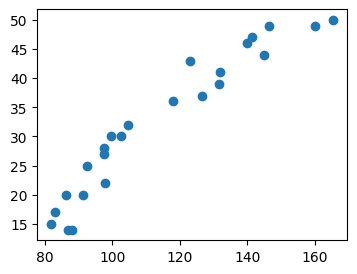

สมการทำนายผลคือ: y = -19.07 + (0.45)x

ปริมาณฝนที่ตก 90 มิลลิเมตร จะขายร่มได้ 21 อัน
ปริมาณฝนที่ตก 100 มิลลิเมตร จะขายร่มได้ 26 อัน
ปริมาณฝนที่ตก 120 มิลลิเมตร จะขายร่มได้ 35 อัน


In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('/content/drive/My Drive/data/umbrellas_sold_1.xlsx')


x = df['rainfall_mm']
y = df['umbrellas_sold']

plt.figure(figsize=(4, 3))
plt.scatter(x, y)
plt.show()

x = np.array(x).reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

ic = '{:.2f}'.format(model.intercept_)
ce = '{:.2f}'.format(model.coef_[0])
print(f'สมการทำนายผลคือ: y = {ic} + ({ce})x')

x_predict = [[90], [100], [120]]
y_predicted = model.predict(x_predict)

print()

#แสดงผลการทำนายทั้งหมด ในแบบเลขจำนวนเต็ม (.0f)
for (i, p) in enumerate(x_predict):
    sale = '{:.0f}'.format(y_predicted[i])
    print(f'ปริมาณฝนที่ตก {p[0]} มิลลิเมตร จะขายร่มได้ {sale} อัน')

ขนาดบ้าน = 1500, จะใช้ไฟประมาณ = 1371.36
ขนาดบ้าน = 2000, จะใช้ไฟประมาณ = 1781.86
R-Squared = 0.982


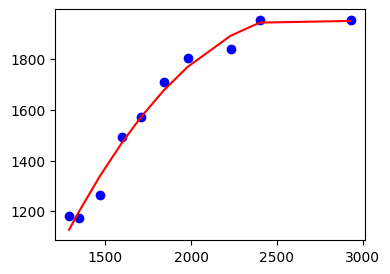

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/data/electricity-consumptions.csv')
#with pd.option_context('display.max_rows', 6): display(df)

x = df['home_size']
y = df['kilowatt_hours_per_month']

pf = PolynomialFeatures(degree=3)
x = np.array(x).reshape(-1, 1)
x_poly= pf.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

#ทำนายผลสำหรับบ้านขนาด 1500 และ 2000
x_predict = [[1500], [2000]]
y_predict = model.predict(pf.transform(x_predict))

for (i, x_p) in enumerate(x_predict):
    kw = '{:.2f}'.format(y_predict[i])
    print(f'ขนาดบ้าน = {x_p[0]}, จะใช้ไฟประมาณ = {kw}')

score = model.score(x_poly, y)
print('R-Squared =', '{:.3f}'.format(score))

#เนื่องจากเราไม่ได้แบ่งชุด Train/Test
#จึงทำนายผลจากข้อมูลทั้งหมดเพื่อวาดกราฟ
y_predict_all = model.predict(x_poly)

plt.figure(figsize=(4, 3))
plt.scatter(x, y, color='b')
plt.plot(x, y_predict_all, color='r')
plt.show()

## Logistic Regression

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('/content/drive/My Drive/data/hours_study.csv')
#with pd.option_context('display.max_rows', 6): display(df)

x = np.array(df['hours_study']).reshape(-1, 1)
y = df['pass']

model = LogisticRegression()
model.fit(x, y)

x_predict = [2.2, 3.3, 4.4]
x_predict = np.array(x_predict).reshape(-1, 1)
y_predict = model.predict(x_predict)

print('Prediction:')
for (i, xp) in enumerate(x_predict):
    #ถ้าผลลัพธ์เป็น 0 เปลี่ยนเป็น Fail ถ้าเป็น 1 เปลี่ยนเป็น Pass ให้สื่อความเข้าใจได้
    r = 'Fail' if y_predict[i] == 0 else 'Pass'
    print(f'Study: {xp[0]} hour(s) => {r}')

print()
print('Logistic Function:')
ic = '{:.2f}'.format(model.intercept_[0])
ce = '{:.2f}'.format(model.coef_[0, 0])

print(f'P(x) = 1 / (1 + exp({ic} + ({ce})x))')

Prediction:
Study: 2.2 hour(s) => Fail
Study: 3.3 hour(s) => Pass
Study: 4.4 hour(s) => Pass

Logistic Function:
P(x) = 1 / (1 + exp(-3.14 + (1.15)x))


In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('/content/drive/My Drive/data/machine-spec.xlsx')
with pd.option_context('display.max_rows', 6): display(df)

x = df[['machine_age_months', 'operate_hours_per_day']]
y = df['machine_meets_spec']

scaler = StandardScaler()
x = scaler.fit_transform(x)

model = LogisticRegression()
model.fit(x, y)

x_predict = [[30, 6], [40, 8], [50, 5], [60, 3]]
#ข้อมูลที่จะทำนายผล ก็ต้องปรับสเกลเช่นเดียวกัน
x_predict_sc = scaler.transform(x_predict)
y_predict = model.predict(x_predict_sc)

print('Prediction:')
for (i, xp) in enumerate(x_predict):
    #คอลัมน์ผลลัพธ์มีค่าเป็น 0/1 จึงเทียบเป็นสตริงที่เข้าใจได้
    mp = 'No' if y_predict[i] == 0 else 'Yes'

    t = f'Machine Age: {xp[0]} Month(s), '
    t += f'Operate: {xp[1]} Hour(s)/Day '
    t += f'=> Meet Spec: {mp}'
    print(t)

print()
print('Logistic Function:')
ic = '{:.2f}'.format(model.intercept_[0])
ce1 = '{:.2f}'.format(model.coef_[0, 0])
ce2 = '{:.2f}'.format(model.coef_[0, 1])

print(f'P(x) = 1 / (1 + exp({ic} + ({ce1})age + ({ce2})hour))')


,machine_age_months,operate_hours_per_day,machine_meets_spec
0,57,4,1
1,73,5,0
2,22,5,1
...,...,...,...
17,71,7,0
18,35,4,0
19,44,5,1


Prediction:
Machine Age: 30 Month(s), Operate: 6 Hour(s)/Day => Meet Spec: Yes
Machine Age: 40 Month(s), Operate: 8 Hour(s)/Day => Meet Spec: No
Machine Age: 50 Month(s), Operate: 5 Hour(s)/Day => Meet Spec: No
Machine Age: 60 Month(s), Operate: 3 Hour(s)/Day => Meet Spec: Yes

Logistic Function:
P(x) = 1 / (1 + exp(-0.14 + (-1.16)age + (-0.98)hour))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Decision Trees

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

df = pd.read_excel('/content/drive/My Drive/data/animals.xlsx')
with pd.option_context('display.max_rows', 10): display(df)

#ข้อมูลชุดนี้มีคอลัมน์ดังนี้
#'Name', 'Blood_Temperature', 'Give_Birth', 'Can_Fly',
#'Live_In_Water', 'Have_Legs', 'Species'
#แต่เราไม่ใช้คอลัมน์ 'Name' ใน Tran Model ดังนั้น เพื่อให้ง่ายต่อการอ้างอิง
#จึงจะลบคอลัมน์ 'Name' ออกจาก DataFrame
df.drop(columns=['Name'], inplace=True)

#with pd.option_context('display.max_rows', 10): display(df)

#ใช้จัดเก็บอินสแตนซ์ LabelEncoder ของแต่ละคอลัมน์
encoders = []

#เนื่องจากคอลัมน์ที่จะเข้ารหัสนั้นอยู่ติดกัน#จึงสามารถใช้ลูป for ได้
for i in range(0, len(df.columns) - 1):
    #สร้างอินสแตนซ์ของ LabelEncoder ที่จะใช้เข้ารหัสของคอลัมน์นั้น
    enc = LabelEncoder()

    #เข้ารหัสคอลัมน์ในลำดับนั้น
    df.iloc[:, i] = enc.fit_transform(df.iloc[:, i])

    #เก็บอินสแตนซ์ที่ใช้เข้ารหัสแต่ละคอลัมน์ไว้ในลิสต์
    encoders.append(enc)

#with pd.option_context('display.max_rows', 6): display(df)

x = df.iloc[:, 0:5]
y = df['Species']

model = DecisionTreeClassifier(criterion='entropy')  #'gini'
model.fit(x, y)

#ค่าที่จะทำนายผล
#Blood_Tem, Give_Birth, Can_Fly, Live_In_Water, Have_Legs
x_pred = ['Warm', 'No', 'Yes', 'Sometimes', 'No']

#เข้ารหัสแต่ละค่าที่จะทำนายผล
#ด้วยอินสแตนซ์เดิมที่เก็บไว้ในลิสต์
for i in range(0, len(df.columns) - 1):
    x_pred[i] = encoders[i].transform([x_pred[i]])

#แปลงเป็นอาร์เรย์ที่มี 5 คอลัมน์ (ตามจำนวน Features)
x_pred_a = np.array(x_pred).reshape(-1, 5) #หรือ len(df.columns)-1
y_pred = model.predict(x_pred_a)

print('Prediction:', y_pred[0])

score = model.score(x, y)
print('Accuracy:', '{:.2f}'.format(score))

,Name,Blood_Temperature,Give_Birth,Can_Fly,Live_In_Water,Have_Legs,Species
0,Human,Warm,Yes,No,No,Yes,Mammals
1,Python,Cold,No,No,No,No,Reptiles
2,Bat,Warm,Yes,Yes,No,Yes,Mammals
3,Frog,Cold,No,No,Sometimes,Yes,Amphibians
4,Salmon,Cold,No,No,Yes,No,Fishes
...,...,...,...,...,...,...,...
15,Platypus,Warm,No,No,No,Yes,Mammals
16,Owl,Warm,No,Yes,No,Yes,Birds
17,Dolphin,Warm,Yes,No,Yes,No,Mammals
18,Eel,Cold,No,No,Yes,No,Fishes


Prediction: Birds
Accuracy: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
